In [2]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

from utils.gmm_posterior import gmm_posterior
import matplotlib
#matplotlib.use('Agg')

## Binary (Banknote autentification)
### Noisy Natarajan matrix

In [3]:
df_list = []
folder_path = 'Results/banknote-authentication_Noisy_Natarajan'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\1715628276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\1715628276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\1715628276.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.692799,Backward,0,0.2,Train
1,2,0.754786,Backward,0,0.2,Train
2,3,0.818596,Backward,0,0.2,Train
3,4,0.855971,Backward,0,0.2,Train
4,5,0.882407,Backward,0,0.2,Train
...,...,...,...,...,...,...
5995,46,0.967273,Forward,9,0.4,Test
5996,47,0.967273,Forward,9,0.4,Test
5997,48,0.967273,Forward,9,0.4,Test
5998,49,0.967273,Forward,9,0.4,Test


['Backward', 'Forward']


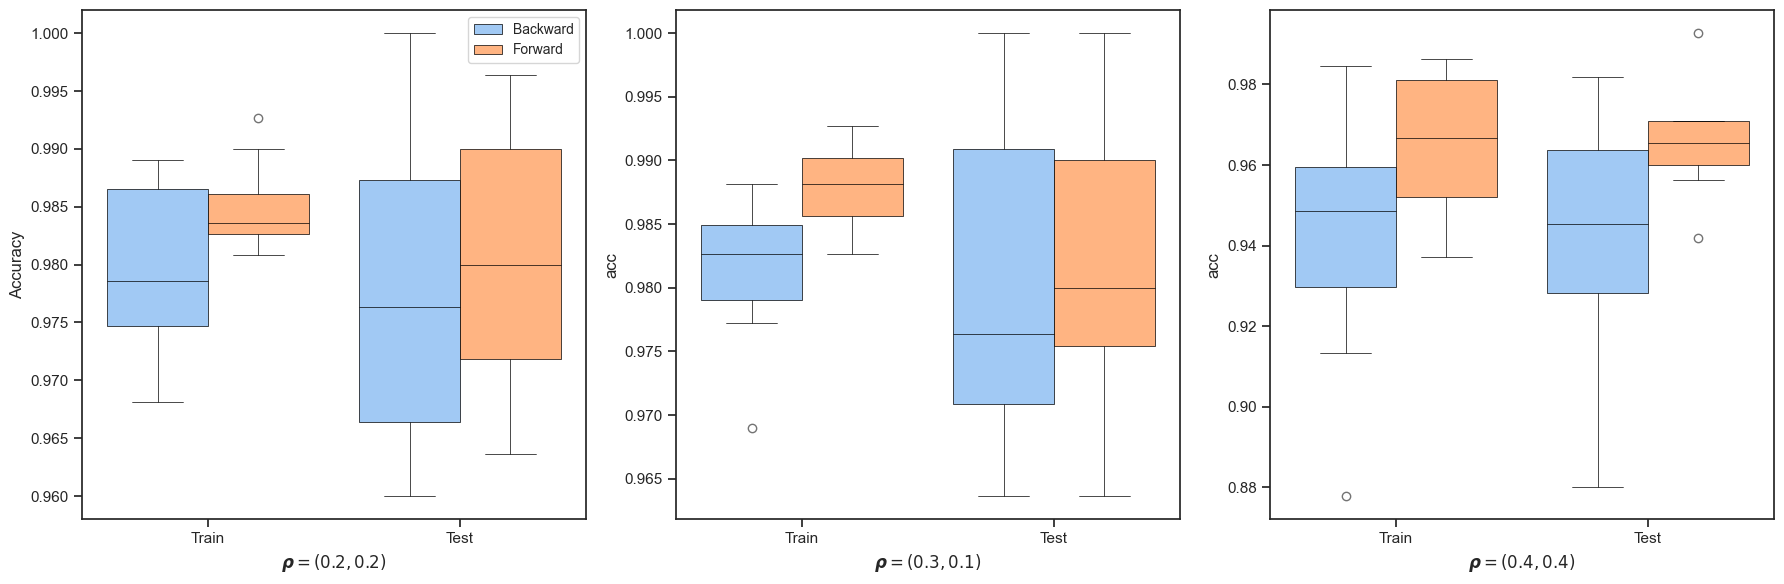

In [4]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.3]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.4]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[0].set_xlabel(r'$\boldsymbol{\rho}=(0.2,0.2)$')
axes[0].set_ylabel('Accuracy')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[1].set_xlabel(r'$\boldsymbol{\rho}=(0.3,0.1)$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[2].set_xlabel(r'$\boldsymbol{\rho}=(0.4,0.4)$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig2.eps', format='eps',dpi=1000)

# MNIST
## Noisy

In [5]:
df_list = []
#folder_path = 'Results/mnist_Noisy_Patrini_MNIST'
folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\1793476117.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\1793476117.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\1793476117.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.836617,Backward_conv,0,0.3,Train
1,2,0.931850,Backward_conv,0,0.3,Train
2,3,0.948117,Backward_conv,0,0.3,Train
3,4,0.955367,Backward_conv,0,0.3,Train
4,5,0.959067,Backward_conv,0,0.3,Train
...,...,...,...,...,...,...
15995,46,0.979500,Forward,9,0.8,Test
15996,47,0.979600,Forward,9,0.8,Test
15997,48,0.978400,Forward,9,0.8,Test
15998,49,0.976600,Forward,9,0.8,Test


['Backward', 'Forward']


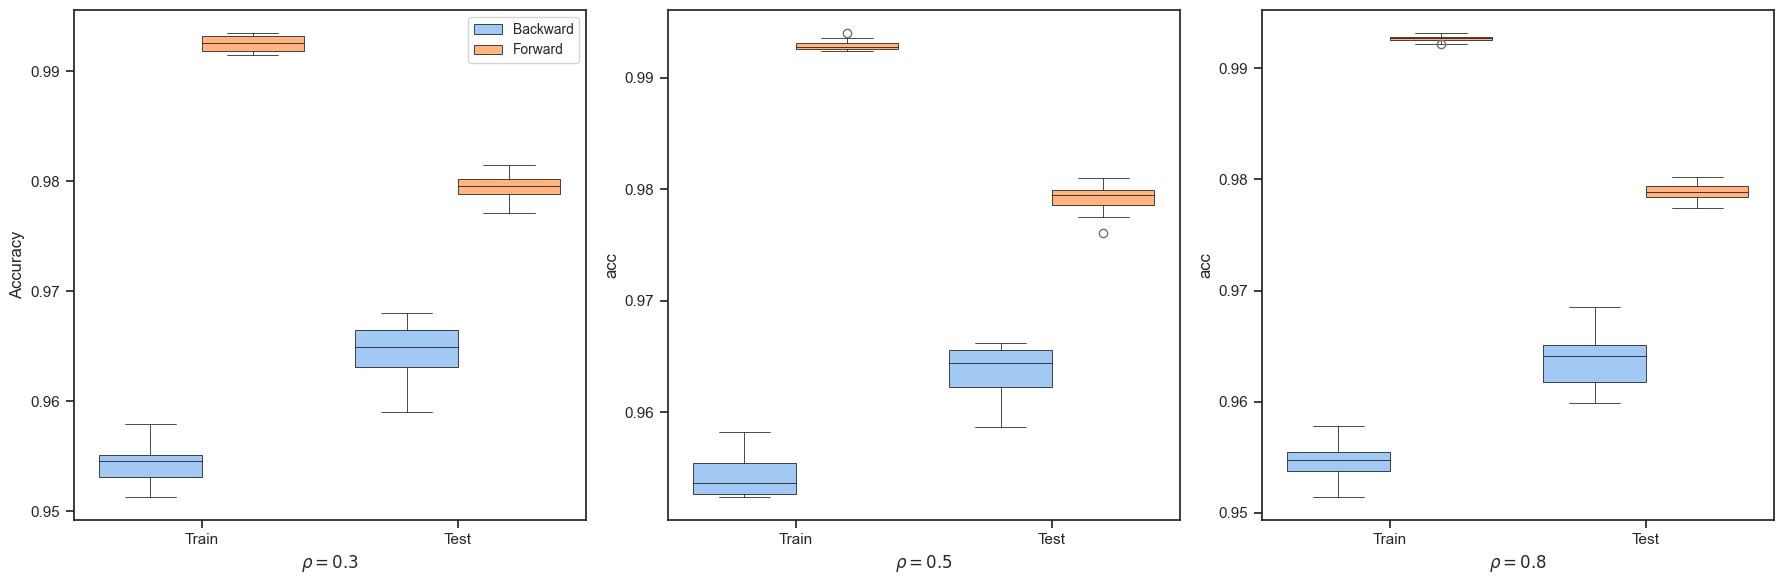

In [8]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.3]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[1].set_xlabel(r'$\rho=0.5$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[2].set_xlabel(r'$\rho=0.8$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig2.eps', format='eps',dpi=1000)

# MNIST
## Complementary


In [11]:
df_list = []
folder_path = 'Results/mnist_Complementary'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\759293591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\759293591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_19348\759293591.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.673750,Backward,0,0.2,Train
1,2,0.770400,Backward,0,0.2,Train
2,3,0.791217,Backward,0,0.2,Train
3,4,0.801917,Backward,0,0.2,Train
4,5,0.806700,Backward,0,0.2,Train
...,...,...,...,...,...,...
1995,46,0.864200,Forward,9,0.2,Test
1996,47,0.870800,Forward,9,0.2,Test
1997,48,0.883600,Forward,9,0.2,Test
1998,49,0.881600,Forward,9,0.2,Test


TypeError: 'Axes' object is not subscriptable

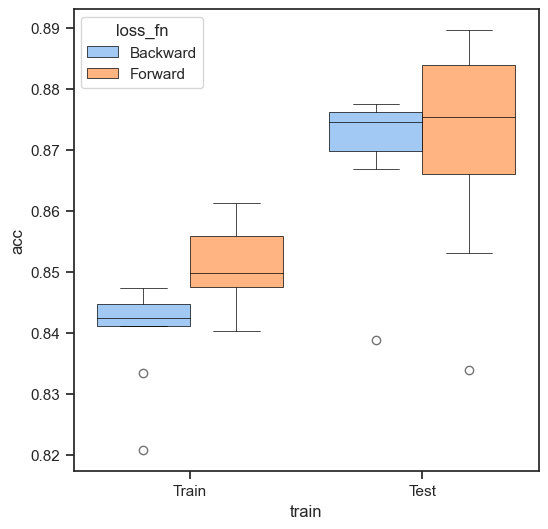

In [13]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 1, figsize=(6, 6), sharey=False)


hue_order = ['Backward', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      
            whiskerprops=dict(color='black', linewidth=0.5),      
            capprops=dict(color='black', linewidth=0.5),          
            medianprops=dict(color='black', linewidth=0.5))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 
# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig2.eps', format='eps',dpi=1000)

# MNIST
## Partial

In [20]:
df_list = []
folder_path = 'Results/mnist_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,0.684109,0.785067,0.8679,0.014582,0.013889,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.349166,0.865033,0.8849,0.013152,0.012697,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.263402,0.874100,0.8950,0.012124,0.011956,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.168747,0.876700,0.8987,0.011344,0.011412,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.102956,0.878750,0.9007,0.011109,0.011445,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8545,46,4.519473,0.916367,0.9237,0.027720,0.028909,Adam,Forward,9,0.001,0.001,0.8
8546,47,4.518848,0.917983,0.9298,0.026618,0.026829,Adam,Forward,9,0.001,0.001,0.8
8547,48,4.519013,0.918433,0.9284,0.026739,0.028045,Adam,Forward,9,0.001,0.001,0.8
8548,49,4.518728,0.917350,0.9328,0.026329,0.027119,Adam,Forward,9,0.001,0.001,0.8


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\523927431.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\523927431.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward_conv', 'Backward_opt_conv', 'Backward_opt', 'Backward', 'Forward_opt', 'Forward']


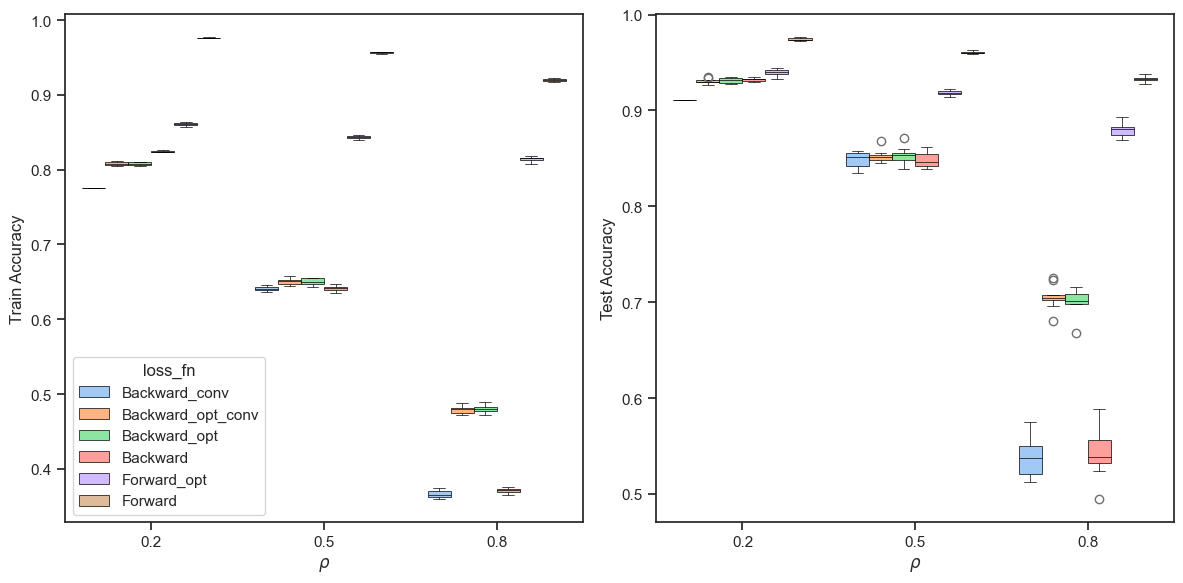

In [21]:
#last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
last_epoch_df = merged_df[merged_df['epoch'] == 50]

epoch_50_df = last_epoch_df
#selected_loss_fns = ['Backward', 'Forward']
#epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
['Backward_conv', 'Backward_opt_conv', 'Backward_opt', 'Backward', 'Forward_opt', 'Forward']
#new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
#axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})
#axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig5.eps', format='eps',dpi=1000)

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\1421153485.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2', '0.5', '0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\1421153485.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2', '0.5', '0.8'])


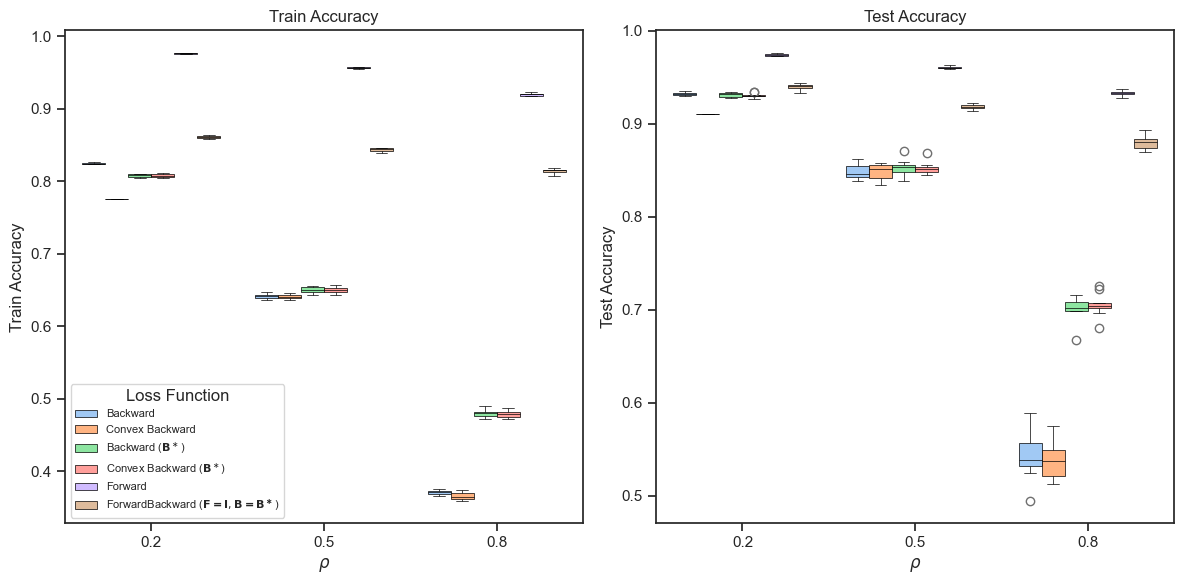

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

epoch_50_df = merged_df[merged_df['epoch'] == 50]

# Set the theme
sns.set_theme(style="ticks", palette="pastel")

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Specify the desired order for loss_fn
hue_order = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', hue_order=hue_order, ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2', '0.5', '0.8'])
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', hue_order=hue_order, ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2', '0.5', '0.8'])

# Remove the second legend to avoid overlap
axes[1].legend().remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()
#plt.savefig('Fig5.eps', format='eps',dpi=1000)

In [23]:
pivot_train = merged_df.pivot_table(index='loss_fn', columns='corr_p', values='train_acc', aggfunc=['mean', 'std'])
pivot_train

mean                           std                    
corr_p                  0.2       0.5       0.8       0.2       0.5       0.8
loss_fn                                                                      
Backward           0.862143  0.727524  0.484767  0.024233  0.059138  0.095516
Backward_conv      0.831013  0.727396  0.482062  0.034805  0.059635  0.097261
Backward_opt       0.849964  0.735468  0.597243  0.026464  0.058319  0.088070
Backward_opt_conv  0.849986  0.735475  0.597155  0.026446  0.058322  0.088094
Forward            0.960604  0.940883  0.905780  0.023171  0.023599  0.027580
Forward_opt        0.885894  0.868775  0.841052  0.017637  0.019522  0.025053

In [24]:
pivot_test = merged_df.pivot_table(index='loss_fn', columns='corr_p', values='test_acc', aggfunc=['mean', 'std'])
pivot_test

mean                           std                    
corr_p                  0.2       0.5       0.8       0.2       0.5       0.8
loss_fn                                                                      
Backward           0.927391  0.859580  0.614220  0.010818  0.010090  0.052655
Backward_conv      0.912030  0.859816  0.612951  0.009255  0.010017  0.053598
Backward_opt       0.925724  0.864918  0.744453  0.011066  0.010004  0.031023
Backward_opt_conv  0.925545  0.864825  0.744437  0.010985  0.009936  0.030596
Forward            0.965726  0.952226  0.925222  0.012288  0.011742  0.010797
Forward_opt        0.935302  0.918686  0.887863  0.011102  0.009867  0.009639

# GMM
## Noisy

In [25]:
df_list = []
folder_path = 'Results/gmm_unif_noise'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.118938,0.793438,0.79625,0.028314,0.028461,Adam,Backward,0,0.001,0.001,0.2
1,2,0.801598,0.801562,0.79625,0.021943,0.022065,Adam,Backward,0,0.001,0.001,0.2
2,3,0.666869,0.802188,0.79750,0.019016,0.019100,Adam,Backward,0,0.001,0.001,0.2
3,4,0.601117,0.803438,0.79750,0.017412,0.017469,Adam,Backward,0,0.001,0.001,0.2
4,5,0.563144,0.804063,0.79750,0.016395,0.016435,Adam,Backward,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,46,1.377080,0.821875,0.84500,0.015781,0.013727,Adam,Forward,9,0.001,0.001,0.8
2996,47,1.377056,0.820312,0.84625,0.015835,0.013762,Adam,Forward,9,0.001,0.001,0.8
2997,48,1.377032,0.820000,0.84625,0.015889,0.013797,Adam,Forward,9,0.001,0.001,0.8
2998,49,1.377010,0.819063,0.84750,0.015943,0.013834,Adam,Forward,9,0.001,0.001,0.8


['Backward', 'Forward']


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\364606762.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\364606762.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


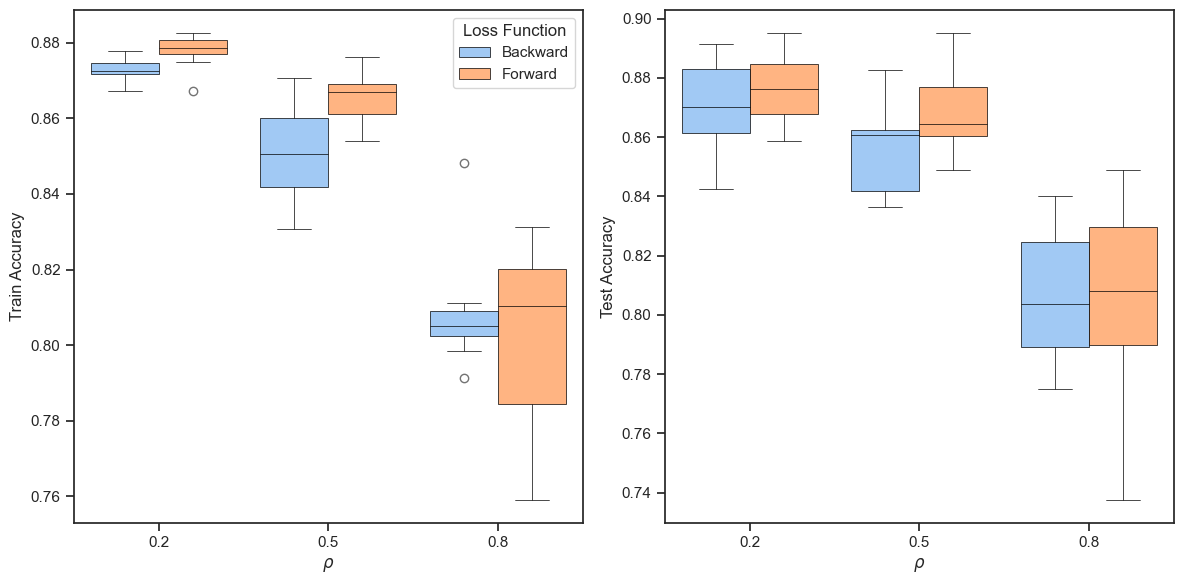

In [26]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#last_epoch_df = merged_df.loc[merged_df['epoch']==30]
#epoch_50_df = merged_df[merged_df['epoch'] == 30]

#selected_loss_fns = ['Backward','Forward','Backward_conv']
selected_loss_fns = ['Backward','Forward']
epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Train Accuracy')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
#axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = [r'Backward',r'Forward']  
axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig6.eps', format='eps',dpi=1000)

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_unif_noise"
corr = [0.2,0.5,0.8] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward', 'Forward',]
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            model_file = folder + f"/{los}_p_+{cor}p_-None_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            data_folder = f"Datasets/weak_datasets/gmm_pll_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.020507,0.073306
1,0.2,Backward,1,0.017193,0.046139
2,0.2,Backward,2,0.021843,0.074189
3,0.2,Backward,3,0.023645,0.076717
4,0.2,Backward,4,0.009448,0.026340
5,0.2,Backward,5,0.011145,0.044414
6,0.2,Backward,6,0.017107,0.042365
7,0.2,Backward,7,0.018942,0.061961
8,0.2,Backward,8,0.018851,0.058671
9,0.2,Backward,9,0.011962,0.030138


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\3852700964.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\3852700964.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Forward']


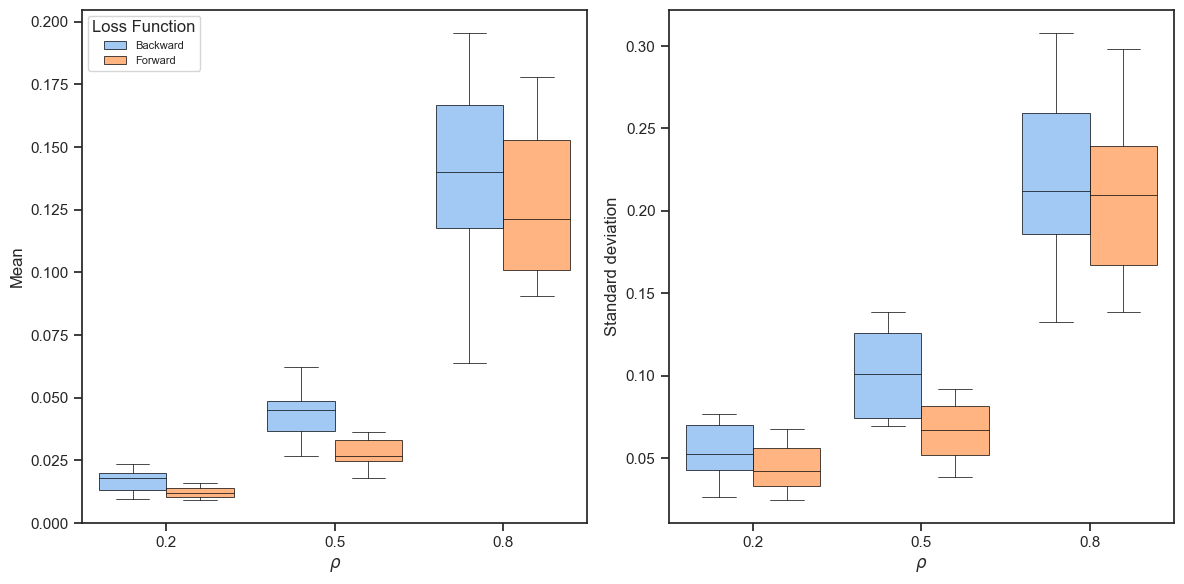

In [28]:
selected_loss_fns = ['Backward', 'Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Mean')
axes[0].set_ylabel('Mean')

axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation')
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig7.eps', format='eps',dpi=1000)

## GMM 
### Complementary

In [29]:
df_list = []
folder_path = 'Results/gmm_Complementary'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.149725,0.783750,0.79625,0.029851,0.030161,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.840278,0.798125,0.79625,0.023433,0.023843,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.692063,0.798438,0.79625,0.020259,0.020688,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.614576,0.799063,0.79625,0.018502,0.018923,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.568918,0.798750,0.79875,0.017415,0.017819,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,46,1.194932,0.864375,0.87875,0.012157,0.011918,Adam,Forward,9,0.001,0.001,0.2
1996,47,1.194858,0.864375,0.87875,0.012143,0.011904,Adam,Forward,9,0.001,0.001,0.2
1997,48,1.194787,0.865000,0.87875,0.012129,0.011890,Adam,Forward,9,0.001,0.001,0.2
1998,49,1.194721,0.864688,0.87875,0.012116,0.011876,Adam,Forward,9,0.001,0.001,0.2


['Backward', 'Forward']


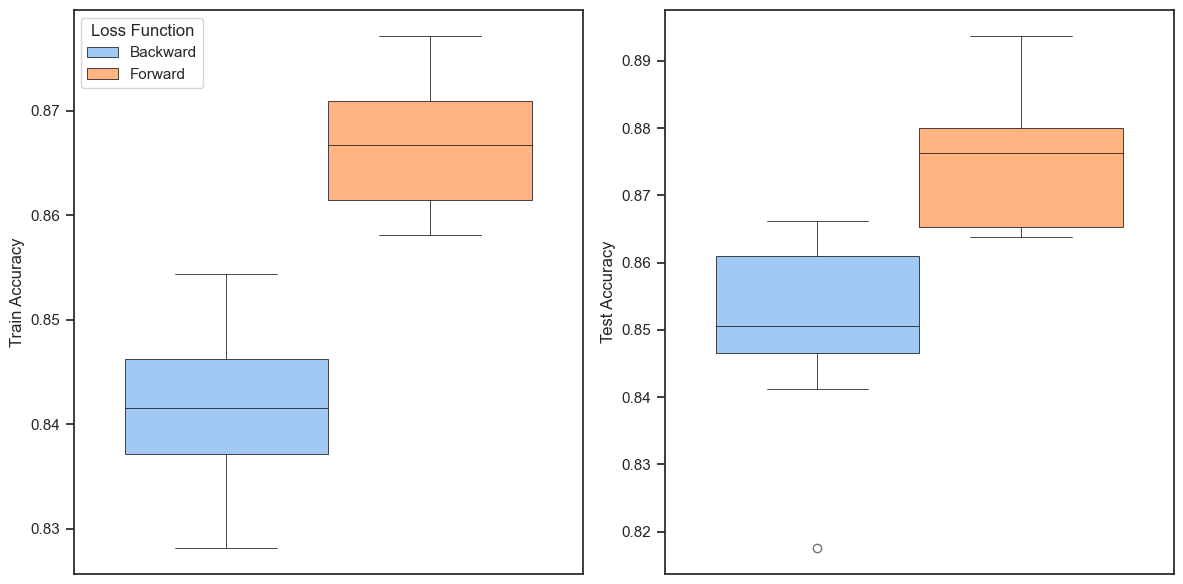

In [30]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 30]

#selected_loss_fns = ['Backward','Forward','Backward_conv']
selected_loss_fns = ['Backward','Forward']
epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Train Accuracy')
axes[0].set_xlabel('')
axes[0].set_ylabel('Train Accuracy')
#axes[0].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = [r'Backward',r'Forward']  
axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Test Accuracy')
axes[1].set_xlabel('')
axes[1].set_ylabel('Test Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig8.eps', format='eps',dpi=1000)

In [31]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_Complementary"
corr = 0.2 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward','Forward','Backward_conv','Forward_opt']
results = []
for los in losses:
    for rep in range(10):
        model_file = folder + f"/{los}_p_+{corr}p_-None_{rep}.pkl"
        with open(model_file, "rb") as f:
            model = pickle.load(f)
            f.close()
        model = model['overall_models']

        data_folder = f"Datasets/weak_datasets/gmm_Complementary_p{corr}"
        data_file = data_folder +  f"/Dataset_{rep}.pkl"
        f = open(data_file,"rb")
        Data,Weak = pickle.load(f)
        data = Data.test_dataset.data.to(device)

        
        yhat = soft(model(data)).cpu().detach().numpy()
        POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
        AB = POS-yhat
        norms = np.diag(AB@AB.T)

        mean_norm = np.mean(norms)
        std_norm = np.std(norms)
        
        # Store values in the results list
        results.append({
            'Corruption':corr,
            "Loss Function": los,
            "Repetition": rep,
            "Mean norm": mean_norm,
            "Std norm": std_norm
        })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.042689,0.104623
1,0.2,Backward,1,0.038606,0.083026
2,0.2,Backward,2,0.072547,0.167305
3,0.2,Backward,3,0.060612,0.153832
4,0.2,Backward,4,0.037947,0.093236
5,0.2,Backward,5,0.037906,0.105829
6,0.2,Backward,6,0.036232,0.094753
7,0.2,Backward,7,0.061577,0.154611
8,0.2,Backward,8,0.048743,0.096322
9,0.2,Backward,9,0.032720,0.106432


['Backward', 'Forward']


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\2981861566.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([' '])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\2981861566.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([' '])


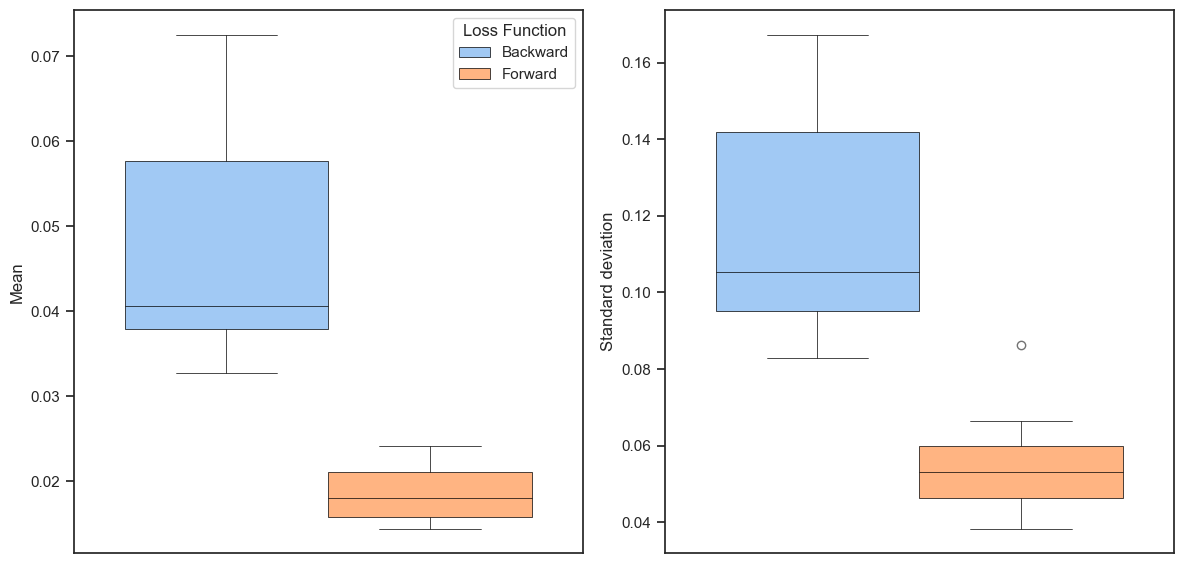

In [32]:
selected_loss_fns = ['Backward', 'Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Mean')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Mean')
axes[0].set_xticklabels([' '])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation')
axes[1].set_xlabel(' ')
#axes[0].set_ylabel('Train Accuracy')
axes[1].set_xticklabels([' '])
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig9.eps', format='eps',dpi=1000)

## GMM 
### Partial

In [33]:
df_list = []
folder_path = 'Results/gmm_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,epoch,train_loss,train_acc,test_acc,train_detached_loss,test_detached_loss,optimizer,loss_fn,repetition,initial_lr,actual_lr,corr_p
0,1,1.117067,0.789687,0.79875,0.028266,0.028594,Adam,Backward_conv,0,0.001,0.001,0.2
1,2,0.789817,0.799375,0.79875,0.021820,0.022241,Adam,Backward_conv,0,0.001,0.001,0.2
2,3,0.648355,0.799687,0.80000,0.018844,0.019260,Adam,Backward_conv,0,0.001,0.001,0.2
3,4,0.578232,0.800625,0.79875,0.017202,0.017586,Adam,Backward_conv,0,0.001,0.001,0.2
4,5,0.537087,0.800625,0.80125,0.016153,0.016502,Adam,Backward_conv,0,0.001,0.001,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,46,1.573098,0.869687,0.87625,0.011620,0.011363,Adam,Forward,9,0.001,0.001,0.8
8996,47,1.573013,0.870000,0.87625,0.011598,0.011337,Adam,Forward,9,0.001,0.001,0.8
8997,48,1.572931,0.870938,0.87875,0.011576,0.011312,Adam,Forward,9,0.001,0.001,0.8
8998,49,1.572852,0.871563,0.87875,0.011556,0.011289,Adam,Forward,9,0.001,0.001,0.8


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\598467843.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\598467843.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']


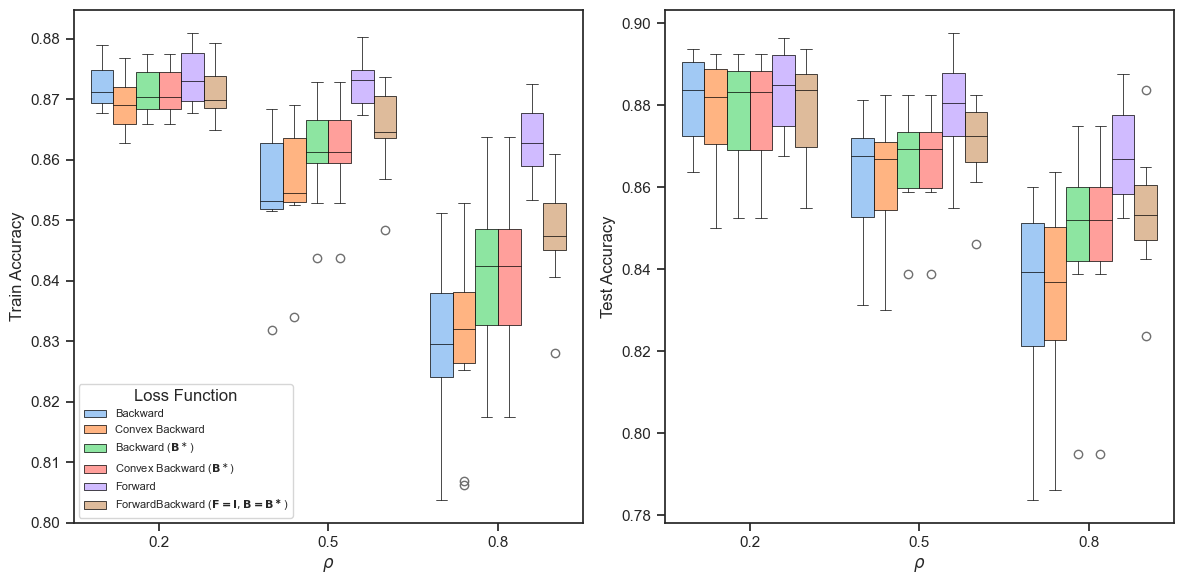

In [34]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 5]

epoch_50_df = last_epoch_df
#selected_loss_fns = ['Backward', 'Forward']
#epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})
#axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig10.eps', format='eps',dpi=1000)

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_pll"
corr = [0.2,0.5,0.8] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            model_file = folder + f"/{los}_p_+{cor}p_-None_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            data_folder = f"Datasets/weak_datasets/gmm_pll_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.014501,0.065421
1,0.2,Backward,1,0.010545,0.033848
2,0.2,Backward,2,0.010841,0.042047
3,0.2,Backward,3,0.015757,0.062976
4,0.2,Backward,4,0.011283,0.033255
...,...,...,...,...,...
175,0.8,Forward_opt,5,0.038886,0.094664
176,0.8,Forward_opt,6,0.028904,0.072707
177,0.8,Forward_opt,7,0.056879,0.142925
178,0.8,Forward_opt,8,0.045080,0.106923


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\3755099956.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\3755099956.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']


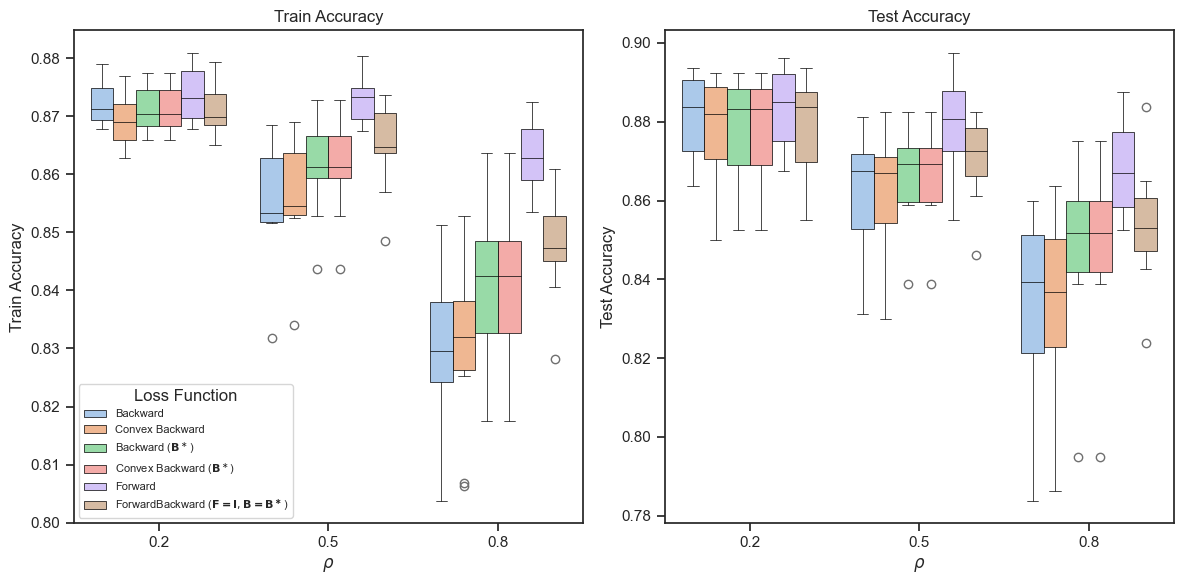

In [36]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 5]

epoch_50_df = last_epoch_df
#selected_loss_fns = ['Backward', 'Forward']
#epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0],
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})
#axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1],
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\708583843.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_11808\708583843.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']


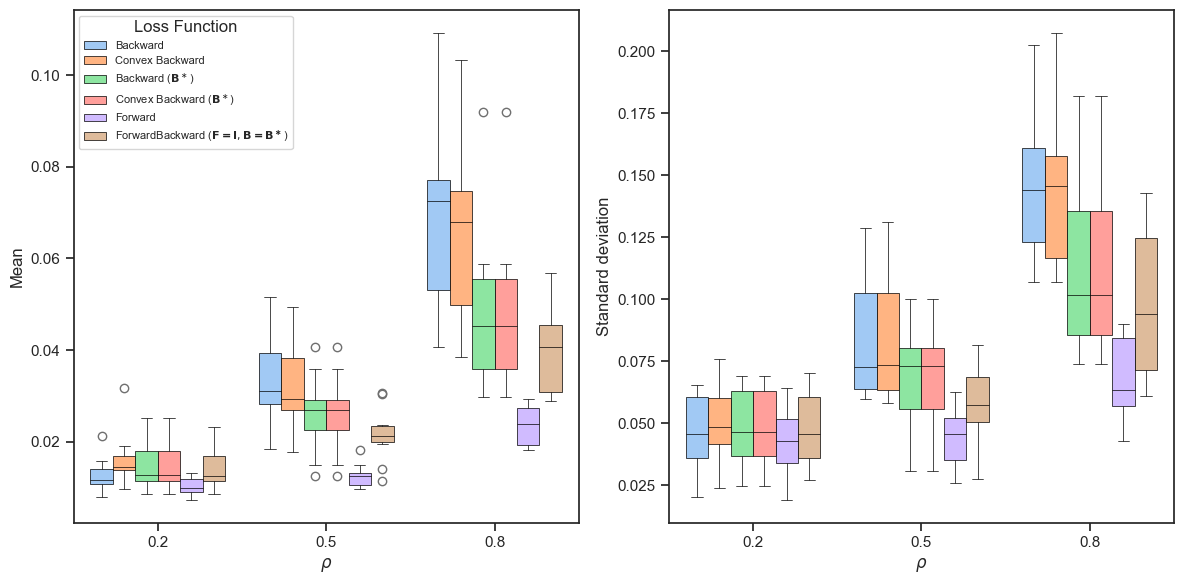

In [37]:
selected_loss_fns = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Mean')
axes[0].set_ylabel('Mean')

axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation')
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig11.eps', format='eps',dpi=1000)